# Telugu News Article Classification Using Natural Language Processing

**Problem Statement:** In this notebook, I tried to classify news paper articles using Natural Language Processing in TensorFlow

* **Data:** The data is taken from Kaggle datasets. You can find the data [here]('https://www.kaggle.com/sudalairajkumar/telugu-nlp?select=telugu_news').

* **Evaluation:** We used accuracy to evaluate the model

I've tried various models for text classification like
* Naive Bayes model
* FeedForward Neural Network
* LSTM
* GRU
* Bidirectional GRU

and found that **GRU model** performs better with accuracy of ***93.69%***  on **validation data** accuracy.

and normal **feedforward network** got an accurary of ***95%*** on **test data**

**Note:** Results may diffeer due to the randomness in our models

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [42]:
# Function to convert pred probs into labels
def make_preds(model, data):
    """
    This function make predictions on the validation data and returns the prediction labels
    """
    pred_probs = model.predict(data)
    preds = tf.argmax(pred_probs, axis=1)
    
    return preds

In [4]:
# Make a function some predictions on test data and visualize them
def visualize_random_preds(model):
    """
    Make predictions with our model and visualize them with their labels
    r
    Args:
        model: model you want to predict the labels with
         
    """
    
    
    # Selecting a random sentence from our validation dataset
    random_number = random.randint(0, len(test_sentences))
    pred_probs = model.predict(test_data)
    y_preds = tf.argmax(pred_probs, axis=1)
    print(f"Text: \n{test_sentences[random_number]}\n")
    print(f"Predicted label: {class_names[y_preds[random_number]]}\n")
    print(f"Original label: {test_labels[random_number]}\n" )



In [5]:
train = pd.read_csv("https://raw.githubusercontent.com/amulyaprasanth/telugu-news-nlp/main/train_telugu_news.csv?token=GHSAT0AAAAAABRUD26EMMTNW7DJCP2RMRSMYQ2HQIA")
test = pd.read_csv("https://raw.githubusercontent.com/amulyaprasanth/telugu-news-nlp/main/test_telugu_news.csv?token=GHSAT0AAAAAABRUD26FEIFCFECPDR4QRQWIYQ2HSFQ")

In [6]:
train.head()

,SNo,date,heading,body,topic
0,414,11-05-2017 00:39:13,ఐడిబిఐపై ఆర్‌బిఐ నజర్‌,భారీ ఎత్తున మొండిబకాయిలు పెరిగిపోవడంతో ఐడిబిఐ ...,business
1,2668,12-06-2017 00:40:32,బ్యాంకింగ్‌ చీఫ్‌లతో నేడు జైట్లీ భేటీ,న్యూఢిల్లీ : ఆర్థిక మంత్రి అరుణ్‌ జైట్లీ సోమవా...,business
2,19923,19-01-2017 19:51:31,కీలక వికెట్ తీసిన జడేజా..,కటక్: ఇంగ్లండ్‌తో జరుగుతున్న సెకండ్ వన్డే మ్యా...,sports
3,15762,23-11-2017 17:29:04,మరో రెచ్చగొట్టే చర్యకు దిగిన పాకిస్థాన్,\nఇస్లామాబాద్ : పాకిస్థాన్ అంతర్జాతీయ ఉగ్రవాది...,nation
4,8624,03-04-2017 15:48:23,గోవాలో కొడుకుతో కలిసి అల్లు అర్జున్ స్విమ్మింగ్!,స్టార్‌ హీరోగా వరుస సినిమాలతో బిజీగా ఉన్నప్పటి...,entertainment


In [7]:
test.head()

,SNo,date,heading,body,topic
0,7771,19-05-2017 13:44:10,కేశవ,హీరోగా తెలుగు సినిమాల్లోకి ఎంట్రీ ఇచ్చిన నిఖిల...,entertainment
1,9591,01-08-2017 13:58:24,డబ్బుల కోసం ప్రాణాల మీదకు తెచ్చుకుంటారా.. హీరో...,సినిమాల్లో యాక్షన్ స్టంట్లు చేసేటప్పుడు ఎక్కు...,entertainment
2,12622,05-04-2017 00:31:58,దక్షిణాదిన బీజేపీ పప్పులుడకవ్‌,దక్షిణ భారతాన్ని ఆక్రమించేందుకు బీజేపీ పంచెలు ...,nation
3,16401,30-08-2017 03:34:37,పీఎస్‌ఎల్వీ-సీ39కి గ్రీన్‌సిగ్నల్‌,నేటి మధ్యాహ్నం 1.59కి కౌంట్‌డౌన్‌ షురూశ్రీహరి...,nation
4,10422,10-04-2017 09:00:48,ఏయ్ జయప్రకాష్ అనే కేక వినిపించింది.. వెనక్కి త...,‘ఏమి రా... అబ్బి... యాడికి పోయినావు’ అంటూ రాయ...,entertainment


In [8]:
# How many classes are there
train["topic"].value_counts()

nation           6628
entertainment    5145
business         2572
sports           1908
editorial        1059
Name: topic, dtype: int64

In [9]:
# Check the data types and shapes of our datasets
train.shape, test.shape

((17312, 5), (4329, 5))

In [10]:
# Before preprocessing our data let's extract the features we need to work with 
features = train["body"].to_numpy()
labels = train["topic"].to_numpy()

test_sentences = test["body"].to_numpy()
test_labels = test["topic"].to_numpy()

In [11]:
# Split our data into train and validation_sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

# Check the length of valid and train datasets
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(13849, 13849, 3463, 3463)

In [12]:
# Convert our labels into numbers
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
train_labels_encoded = enc.fit_transform(train_labels)
val_labels_encoded = enc.transform(val_labels)
test_labels_encoded = enc.transform(test_labels)

In [13]:
class_names = np.unique(train_labels)
class_names

array(['business', 'editorial', 'entertainment', 'nation', 'sports'],
      dtype=object)

## Becoming one with the data (Inspecting the data)

In [14]:
len(features)

17312

In [15]:
# visuolise random train data and its labels
import random 
random_sentence = random.choice(features)
print(random_sentence)

‘‘ఎదుటివారి మనసును తెలుసుకుని ప్రవర్తించడం గొప్ప గుణం. అలాంటి అద్భుతమైన గుణాన్ని నేను పవర్‌స్టార్‌లో చూశాను. నా జీవితంలో ఇంత గొప్ప వ్యక్తితో కలిసి పనిచేయడానికి మర్చిపోలేను’’ అని అన్నారు అను ఇమ్మాన్యుయేల్‌. ఈ భామ ప్రస్తుతం త్రివిక్రమ్‌ దర్శకత్వంలో పవనకల్యాణ్‌ సినిమాలో నటిస్తోంది. అను మాట్లాడుతూ ‘‘ఇటీవల ‘మీకు ఇష్టమైన ఆహారం ఏంటి’ అని పవనకల్యాణ్‌గారు అడిగారు. ‘ఆప్పమ్‌’ అని సమాధానమిచ్చాను. కేజువల్‌గానే అడుగుతున్నారని అనకున్నా. మరుసటి రోజు ఉదయం నాకు ఆప్పమ్‌ పార్శిల్‌ వచ్చేసింది. చూసి ఆశ్చర్యపోయాను. నా జీవితంలో ఇలాంటి గొప్ప వ్యక్తిని మర్చిపోలేను’’ అని చెప్పారు.


### Creating a baseline model

This is a model we've to beat


In [16]:
# Let's train a naive bayes model using tf-idf-vectorizer

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

baseline_model = Pipeline([
    ("tfidf_vectorizer", TfidfVectorizer()),
    ("naive_bayes", MultinomialNB())
])

baseline_model.fit(train_sentences, train_labels_encoded)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                ('naive_bayes', MultinomialNB())])

In [17]:
# Evaluate the base model 
baseline_model.score(val_sentences, val_labels_encoded)

0.7403984984117817

In [18]:
# Making predictions with our model
baseline_preds = baseline_model.predict(val_sentences)
baseline_preds[:10], len(baseline_preds)

(array([2, 3, 3, 3, 2, 3, 3, 3, 3, 3]), 3463)

In [19]:
# Get basemodel results
baseline_results = calculate_results(val_labels_encoded, baseline_preds)
baseline_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 74.03984984117817,
 'f1': 0.7024314343853166,
 'precision': 0.766110761383885,
 'recall': 0.7403984984117817}

## Preprocess the data

Before going to Neural Networks we need to turn our data into numerical format in which our model can understand

* TextVectorization  (Converting our text into numbers)
* Embedding layer ( Creating embeddings from the text vectors)

In [20]:
from tensorflow.keras.layers import TextVectorization, Embedding

In [21]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

172

In [22]:
# Instantiating our text vectorization layer with required parameters
max_vocab_length = 10000 # Max number of words in our vocabulary
max_length = 173 # Output sequence length
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                   output_sequence_length=max_length)

In [23]:
# Fit the text vectorizer
text_vectorizer.adapt(train_sentences)

In [24]:
# Test out the text vectorization layer
# sample_sentence = "ఇండియ‌న్ వారెన్ బ‌ఫెట్ రాకేష్ ఝున్‌ఝున్ వాలా ఐటీ ఉద్యోగాల‌పై ఆస‌క్తిక‌ర విష‌యాల్ని వెల్ల‌డించారు."
# text_vectorizer([sample_sentence]) # The text vectorization layer is working fine

In [25]:
# Creating embedding layer
embedding_1 = Embedding(input_dim=max_vocab_length,
                       output_dim=128,
                       embeddings_initializer='uniform',
                       input_length=max_length,
                       name="embedding_1")

In [26]:
# Test out the embedding layer
# sample_sentence = "ఇండియ‌న్ వారెన్ బ‌ఫెట్ రాకేష్ ఝున్‌ఝున్ వాలా ఐటీ ఉద్యోగాల‌పై ఆస‌క్తిక‌ర విష‌యాల్ని వెల్ల‌డించారు."
# sample_embedding = embedding_1(text_vectorizer([sample_sentence]))
# sample_embedding

In [27]:
# turn our data into tensorflow datasets
train_sentences_dataset = tf.data.Dataset.from_tensor_slices(train_sentences)
train_labels_encoded_dataset = tf.data.Dataset.from_tensor_slices(train_labels_encoded)
train_data = tf.data.Dataset.zip((train_sentences_dataset, train_labels_encoded_dataset)).batch(32).prefetch(tf.data.AUTOTUNE)

val_sentences_dataset = tf.data.Dataset.from_tensor_slices(val_sentences)
val_labels_encoded_dataset = tf.data.Dataset.from_tensor_slices(val_labels_encoded)
val_data = tf.data.Dataset.zip((val_sentences_dataset, val_labels_encoded_dataset)).batch(32).prefetch(tf.data.AUTOTUNE)

test_sentences_dataset = tf.data.Dataset.from_tensor_slices(test_sentences)
test_labels_encoded_dataset = tf.data.Dataset.from_tensor_slices(test_labels_encoded)
test_data = tf.data.Dataset.zip((test_sentences_dataset, test_labels_encoded_dataset)).batch(32).prefetch(tf.data.AUTOTUNE)

train_data, val_data, test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Let's build some models
We've converted our text into numbers.
Now let's build some models
* Dense model
* LSTM
* GRU
* Bidirectional LSTM
* 1D Conv network
* Transfer Learning

### Dense model

In [28]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, Bidirectional, Input, GlobalAveragePooling1D, GlobalMaxPooling1D

In [29]:
# Create dense model with Functinal API
inputs = Input(shape=(1,), dtype="string", name="input_layer")
x = text_vectorizer(inputs)
x = embedding_1(x)
x = GlobalAveragePooling1D(name='global_pooling_layer')(x)
outputs = Dense(5, activation="softmax", name="output_layer")(x)

model_1 = Model(inputs, outputs, name="dense_model")

In [30]:
# Check the summary of the model
model_1.summary()

Model: "dense_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 173)              0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 173, 128)          1280000   
                                                                 
 global_pooling_layer (Globa  (None, 128)              0         
 lAveragePooling1D)                                              
                                                                 
 output_layer (Dense)        (None, 5)                 645       
                                                                 
Total params: 1,280,645
Trainable params: 1,280,645
Non

In [31]:
# Compile the model
model_1.compile(loss="sparse_categorical_crossentropy",
               optimizer='adam',
               metrics=["accuracy"])

In [32]:
# Fit the model
dense_model_history = model_1.fit(train_data,
                                 epochs=10,
                                 steps_per_epoch=len(train_data),
                                 validation_data=val_data,
                                 validation_steps=len(val_data))

Epoch 1/10
433/433 [==============================] - 13s 18ms/step - loss: 1.0687 - accuracy: 0.6402 - val_loss: 0.6340 - val_accuracy: 0.7996
Epoch 2/10
433/433 [==============================] - 8s 18ms/step - loss: 0.4392 - accuracy: 0.8828 - val_loss: 0.3572 - val_accuracy: 0.8929
Epoch 3/10
433/433 [==============================] - 7s 15ms/step - loss: 0.2647 - accuracy: 0.9315 - val_loss: 0.2713 - val_accuracy: 0.9125
Epoch 4/10
433/433 [==============================] - 5s 11ms/step - loss: 0.1887 - accuracy: 0.9499 - val_loss: 0.2293 - val_accuracy: 0.9261
Epoch 5/10
433/433 [==============================] - 5s 11ms/step - loss: 0.1431 - accuracy: 0.9636 - val_loss: 0.2053 - val_accuracy: 0.9327
Epoch 6/10
433/433 [==============================] - 5s 11ms/step - loss: 0.1121 - accuracy: 0.9735 - val_loss: 0.1908 - val_accuracy: 0.9394
Epoch 7/10
433/433 [==============================] - 5s 11ms/step - loss: 0.0895 - accuracy: 0.9793 - val_loss: 0.1820 - val_accuracy: 0.942

In [43]:
# Get evaluation metrics for our dense model
dense_results = calculate_results(val_labels_encoded, make_preds(model_1, val_data))
dense_results

{'accuracy': 94.34016748483972,
 'f1': 0.9433388059707539,
 'precision': 0.9445587397947284,
 'recall': 0.9434016748483973}

In [33]:
# calculate results
dense_results = model_1.evaluate(test_data)
dense_results

136/136 [==============================] - 1s 6ms/step - loss: 0.1625 - accuracy: 0.9506


[0.16247162222862244, 0.9505659341812134]

### LSTM model

In [34]:
# Recreate another embedding layer
embedding_2 = Embedding(input_dim=max_vocab_length,
                       output_dim=128,
                        input_length=max_length,
                       name="embedding_2")

# Create LSTM model with functional API
inputs = Input(shape=(1,), dtype="string", name="input_layer")
x = text_vectorizer(inputs)
x = embedding_2(x)
# x = LSTM(64, return_sequences=True)(x)
x = LSTM(64)(x)
outputs = Dense(5, activation="softmax", name="output_layer")(x)

model_2 = Model(inputs, outputs, name="lstm_model")

# Compile the model
model_2.compile(loss="sparse_categorical_crossentropy",
               optimizer='adam',
               metrics=["accuracy"])


# Fit the model
lstm_model_history = model_2.fit(train_data,
                                 epochs=10,
                                 steps_per_epoch=len(train_data),
                                 validation_data=val_data,
                                 validation_steps=len(val_data))

Epoch 1/10
433/433 [==============================] - 24s 46ms/step - loss: 1.3746 - accuracy: 0.3958 - val_loss: 1.3763 - val_accuracy: 0.3910
Epoch 2/10
433/433 [==============================] - 19s 45ms/step - loss: 1.2767 - accuracy: 0.4639 - val_loss: 1.4096 - val_accuracy: 0.4069
Epoch 3/10
433/433 [==============================] - 20s 46ms/step - loss: 1.0236 - accuracy: 0.6313 - val_loss: 0.8356 - val_accuracy: 0.7173
Epoch 4/10
433/433 [==============================] - 19s 45ms/step - loss: 0.5983 - accuracy: 0.8090 - val_loss: 0.4366 - val_accuracy: 0.8727
Epoch 5/10
433/433 [==============================] - 19s 45ms/step - loss: 0.2850 - accuracy: 0.9233 - val_loss: 0.2877 - val_accuracy: 0.9197
Epoch 6/10
433/433 [==============================] - 19s 44ms/step - loss: 0.1431 - accuracy: 0.9615 - val_loss: 0.2376 - val_accuracy: 0.9327
Epoch 7/10
433/433 [==============================] - 19s 44ms/step - loss: 0.0869 - accuracy: 0.9783 - val_loss: 0.2276 - val_accuracy:

In [45]:
# Get evaluation metrics for our lstm model
lstm_results = calculate_results(val_labels_encoded, make_preds(model_2, val_data))
lstm_results

{'accuracy': 93.5604966791799,
 'f1': 0.934641100429773,
 'precision': 0.9364202501786795,
 'recall': 0.935604966791799}

In [37]:
# Evaluate on test data
model_2.evaluate(test_data)

136/136 [==============================] - 2s 17ms/step - loss: 0.2800 - accuracy: 0.9386


[0.28002414107322693, 0.9385539293289185]

### GRU model

In [38]:
# Recreate another embedding layer
embedding_3 = Embedding(input_dim=max_vocab_length,
                       output_dim=128,
                        input_length=max_length,
                       name="embedding_3")

# Create LSTM model with functional API
inputs = Input(shape=(1,), dtype="string", name="input_layer")
x = text_vectorizer(inputs)
x = embedding_3(x)
x = GRU(64)(x)
outputs = Dense(5, activation="softmax", name="output_layer")(x)

model_3 = Model(inputs, outputs, name="gru_model")

# Compile the model
model_3.compile(loss="sparse_categorical_crossentropy",
               optimizer='adam',
               metrics=["accuracy"])


# Fit the model
gru_model_history = model_3.fit(train_data,
                                 epochs=10,
                                 steps_per_epoch=len(train_data),
                                 validation_data=val_data,
                                 validation_steps=len(val_data))

Epoch 1/10
433/433 [==============================] - 28s 57ms/step - loss: 1.3656 - accuracy: 0.4115 - val_loss: 0.8978 - val_accuracy: 0.6708
Epoch 2/10
433/433 [==============================] - 21s 49ms/step - loss: 0.4159 - accuracy: 0.8577 - val_loss: 0.2154 - val_accuracy: 0.9324
Epoch 3/10
433/433 [==============================] - 23s 53ms/step - loss: 0.1097 - accuracy: 0.9692 - val_loss: 0.2092 - val_accuracy: 0.9385
Epoch 4/10
433/433 [==============================] - 19s 45ms/step - loss: 0.0493 - accuracy: 0.9880 - val_loss: 0.2214 - val_accuracy: 0.9417
Epoch 5/10
433/433 [==============================] - 19s 45ms/step - loss: 0.0258 - accuracy: 0.9943 - val_loss: 0.2473 - val_accuracy: 0.9417
Epoch 6/10
433/433 [==============================] - 19s 45ms/step - loss: 0.0130 - accuracy: 0.9966 - val_loss: 0.2512 - val_accuracy: 0.9414
Epoch 7/10
433/433 [==============================] - 20s 45ms/step - loss: 0.0078 - accuracy: 0.9982 - val_loss: 0.2932 - val_accuracy:

In [46]:
# Get evaluation metrics for our gru model
gru_results = calculate_results(val_labels_encoded, make_preds(model_3, val_data)) 
gru_results

{'accuracy': 94.34016748483972,
 'f1': 0.9430489184705798,
 'precision': 0.9432792111940288,
 'recall': 0.9434016748483973}

In [39]:
model_3.evaluate(test_data)

136/136 [==============================] - 2s 18ms/step - loss: 0.3548 - accuracy: 0.9319


[0.35483884811401367, 0.9318549036979675]

### Bidirectional model


In [40]:
# Recreate another embedding layer
embedding_4 = Embedding(input_dim=max_vocab_length,
                       output_dim=128,
                        input_length=max_length,
                       name="embedding_4")

# Create LSTM model with functional API
inputs = Input(shape=(1,), dtype="string", name="input_layer")
x = text_vectorizer(inputs)
x = embedding_4(x)
x = Bidirectional(GRU(64))(x)
outputs = Dense(5, activation="softmax", name="output_layer")(x)

model_4 = Model(inputs, outputs, name="bidirectional_model")

# Compile the model
model_4.compile(loss="sparse_categorical_crossentropy",
               optimizer='adam',
               metrics=["accuracy"])


# Fit the model
bidirectional_model_history = model_4.fit(train_data,
                                 epochs=10,
                                 steps_per_epoch=len(train_data),
                                 validation_data=val_data,
                                 validation_steps=len(val_data))

Epoch 1/10
433/433 [==============================] - 40s 84ms/step - loss: 0.5583 - accuracy: 0.7965 - val_loss: 0.2442 - val_accuracy: 0.9174
Epoch 2/10
433/433 [==============================] - 35s 82ms/step - loss: 0.1426 - accuracy: 0.9539 - val_loss: 0.2380 - val_accuracy: 0.9255
Epoch 3/10
433/433 [==============================] - 35s 82ms/step - loss: 0.0596 - accuracy: 0.9845 - val_loss: 0.2410 - val_accuracy: 0.9310
Epoch 4/10
433/433 [==============================] - 37s 86ms/step - loss: 0.0283 - accuracy: 0.9926 - val_loss: 0.2837 - val_accuracy: 0.9324
Epoch 5/10
433/433 [==============================] - 39s 90ms/step - loss: 0.0140 - accuracy: 0.9962 - val_loss: 0.2987 - val_accuracy: 0.9249
Epoch 6/10
433/433 [==============================] - 38s 87ms/step - loss: 0.0086 - accuracy: 0.9979 - val_loss: 0.3284 - val_accuracy: 0.9261
Epoch 7/10
433/433 [==============================] - 38s 88ms/step - loss: 0.0086 - accuracy: 0.9979 - val_loss: 0.3434 - val_accuracy:

In [48]:
# Get results for the bidirectional model
bidirectional_results = calculate_results(val_labels_encoded, make_preds(model_4, val_data))
bidirectional_results

{'accuracy': 92.17441524689576,
 'f1': 0.9200659982956063,
 'precision': 0.9202233317405448,
 'recall': 0.9217441524689576}

In [49]:
model_4.evaluate(test_data)

136/136 [==============================] - 5s 34ms/step - loss: 0.4134 - accuracy: 0.9265


[0.41337162256240845, 0.9265419244766235]

In [76]:
# Visualize model metrics
import pandas as pd

results = pd.DataFrame({"dense_model": dense_results,
                        "lstm_model": lstm_results,
                        "gru_model": gru_results,
                        "bidirectional_model(GRU layer)": bidirectional_results})
results = results.T
results

,accuracy,precision,recall,f1
dense_model,94.340167,0.944559,0.943402,0.943339
lstm_model,93.560497,0.936420,0.935605,0.934641
gru_model,94.340167,0.943279,0.943402,0.943049
bidirectional_model(GRU layer),92.174415,0.920223,0.921744,0.920066


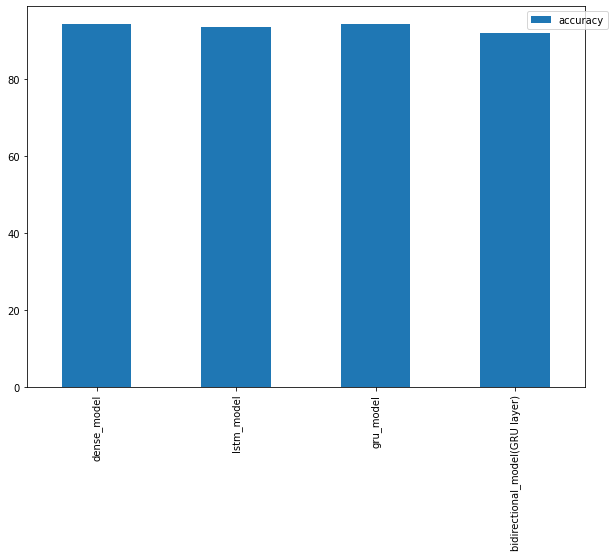

In [81]:
import matplotlib.pyplot as plt
results["accuracy"].plot(kind="bar", figsize=(10, 7))
plt.legend(bbox_to_anchor=(1.05, 1));

plt.show()

In [50]:
# Visualise model predictions
visualize_random_preds(model_3)

Text: 
బెంగళూరు: విలక్షణ నటుడు ప్రకాష్ రాజ్ మరోసారి సంచలన వ్యాఖ్యలు చేశారు. సినిమా వాళ్లు రాజకీయాల్లోకి వస్తే దేశం నాశనమవుతుందని అన్నారు. తాను రాజకీయాల్లోకి రావాలనుకోవడం లేదని చెప్పారు. ఆదివారంనాడిక్కడ మీడియాతో ఆయన మాట్లాడుతూ, రాజకీయాల్లోకి నటులు రావడం తాను ఇష్టపడనని చెప్పారు. ఎందుకంటే వారు నటులని, అభిమానులు ఉంటారని అన్నారు. నటులుగా తమకున్న బాధ్యతలను వారు గుర్తెరగాలని ఆయన అన్నారు. ప్రకాష్ రాజ్ రాజకీయాల్లోకి వస్తారని కొద్దికాలంగా వస్తున్న ఊహాగానాలను ఆయన కొట్టివేశారు. ఏ రాజకీయ పార్టీలోనూ తాను చేరిదే లేదని స్పష్టం చేశారు. సినిమా హాళ్లలో జాతీయగీతాలాపన సమయంలో ప్రేక్షకులు తప్పనిసరిగా లేచి నిలబడి దేశభక్తిని  నిరూపించుకోవాలని తాను అనుకోవడం లేదని అన్నారు. పలు అంశాలపై తాను అభిప్రాయాలు చెప్పినప్పుడు కొందరు తన పనిని అడ్డుకోవాలని చూస్తున్నారని, అయితే వారి పేర్లు తాను వెల్లడించనని అన్నారు. 'నా చివరి క్షణం వరకూ తినేందుకు అవసరమైన డబ్బు నా దగ్గర ఉంది' అని ఆయన పేర్కొన్నారు. బెంగళూరులో జర్నలిస్టు గౌరీ లంకేష్ హత్య విషయంలో ప్రధాని మోదీ మౌనంగా ఉండటాన్ని గత నెలలో ప్రకాష్ రాజ్ ప్రశ్నించారు. మోదీ తనకంటే మంచి న

In [51]:
visualize_random_preds(model_3)

Text: 
క్లీన్‌స్వీప్ లక్ష్యంగా భారత్ప్రయోగాలకు సిద్ధం!నేడు శ్రీలంకతో చివరి టీ20 ‘రికార్డు’ స్థాయి ఆటతీరుతో వరుసగా రెండు టీ20 లను నెగ్గి ఇప్పటికే సిరీస్‌ను పట్టేశారు.. ఇక మిగిలింది లంకను వైట్‌వాష్‌ చేయడమే! టెస్టులు, వన్డేల్లో కాస్త పోటీ ఎదురైనా పొట్టి ఫార్మాట్‌లో భారత్‌ భీకర ఆటతీరుతో పర్యాటక జట్టుపై విరుచుకుపడుతోంది. ఇదే జోరును కొనసాగించడంతో పాటు తమ రిజర్వ్‌ బెంచ్‌ బలాన్ని పరీక్షించుకునేందుకూ భారత్‌కు ఇదే సరైన సమయం. అలాగే ఈ ఏడాదిని దిగ్విజయంగా ముగిస్తూ కఠినమైన దక్షిణాఫ్రికా పర్యటనకు జోష్‌గా వెళ్లాలని భావిస్తోంది. మరోవైపు బౌలర్ల నుంచి ఎలాంటి సహకారం అందని స్థితికి తోడు కీలక ఆటగాడు మాథ్యూస్‌ దూరం కావడం లంకను ఇబ్బంది పెడుతోంది. ఈ నేపథ్యంలో ఆఖరి పోరులోనైనా నెగ్గి పరువు కాపాడుకుంటుందో లేదో చూడాలి. ముంబై: భారత్‌తో జరుగుతున్న మూడు టీ20ల సిరీస్‌ నిజానికి శ్రీలంకకు పీడకలగా మిగులుతోంది. ఈ సిరీస్‌లో మొదటి మ్యాచ్‌ ఆ జట్టుకు ఓవరాల్‌గా వందోది.. చిరస్మరణీయం కావాల్సిన ఆ మ్యాచ్‌ వారికి చేదు అనుభ వాన్నే మిగిల్చింది. కేవలం 87 పరుగులకే కుప్పకూలి 93 రన్స్‌ తేడాతో ఓడింది. ఇది ఆ జట్టుకు అత్యధిక పరుగుల తేడా ఓట 

In [52]:
visualize_random_preds(model_3)

Text: 

టర్కీ తీరంలో మృతశిశువు..అలన్‌ కుర్దీ గుర్తున్నాడా? ఆ బాలుడిలాంటి దీనగాథే ఈ పసికందుదీ!! అమ్మఒడిలో ఆనందంగా ఆటలాడుకోవాల్సిన పదహారు నెలల చిన్నారి.. ఇలా చనిపోయి బురదలో మృతశిశువుగా పడి ఉండటం వెనుక కూడా అదే కథ..! ఈ చిన్నారి పేరు మహ్మద్‌ షొహాయత. మయన్మార్‌లోని రఖైన్‌ ప్రాంతంలో నివసిస్తున్న రోహింగ్యా వర్గానికి చెందిన జాఫర్‌ ఆలం కుమారుడు. మయన్మార్‌లో రోహింగ్యా ముస్లిం వర్గంపై జరుగుతున్న దాడుల నుంచి తప్పించుకునేందుకు ఆలం కుటుంబం పడవలో బంగ్లాదేశ్‌కు బయల్దేరడానికి సిద్ధమైంది. ఈ విషయం తెలిసి మయన్మార్‌ పోలీసులు అక్కడికి చేరుకుని కాల్పులు ప్రారంభించారు. బోటు నడిపేవారు.. కాల్పులు తప్పించుకునే తొందరలో శరణార్థులందరినీ ఎక్కించుకుని బయల్దేరారు. పరిమితికి మించిన బరువుతో నిండుగర్భిణిలా బయల్దేరిన పడవ.. గమ్యం చేరకముందే నాఫ్‌ నదిలో మునిగిపోయింది. 16 నెలల షొహాయత, అతడి తల్లి, మేనమామ, మూడేళ్ల సోదరుడు ఈ ప్రమాదంలో అసువులు బాశారు. షొహాయత శరీరం ఇలా ఒడ్డుకు కొట్టుకొచ్చింది. ముద్దులొలికే బిడ్డను ఇలా మృతదేహంగా చూసి ఆ కన్నతండ్రి హృదయవిదారకంగా రోదిస్తున్నాడు. ఇక ఈ లోకంలో తాను బతికి అర్థంలేదని విలపిస్తున్నాడు.

Predi

In [54]:
visualize_random_preds(model_3)

Text: 
 చెన్నై: ప్రసారమాధ్యమాల్లో నిర్వహించే చర్చావేదికల్లో పాల్గొని పార్టీలో చిచ్చు రగిలేందుకు కారణమవుతున్న సీనియర్‌ నేతలను ముఖ్యమంత్రి ఎడప్పాడి, ఉపముఖ్యమంత్రి పన్నీర్‌ సెల్వంలు తీవ్రంగా హెచ్చరించినట్టు తెలుస్తోంది. ఇకమీదట తదుపరి ఉత్తర్వులు అందేవరకు ఎవరూ టీవీ చర్చావేదికల్లో పాల్గొన కూడదని ఆంక్షలు విధించారు. మాజీ ముఖ్యమంత్రి జయలలిత హయాంలో పార్టీ నాయకులు గానీ, మంత్రులు గానీ ప్రసారమాధ్యమాలకు దూరంగా ఉండే వారు. ప్రత్యేకించి టీవీ ఛానళ్లలో జరిగే చర్చావేదికల్లో ఎవరినీ పాల్గొననీయకుండా జయలలిత కట్టుదిట్టం చేసేవారు. అయితే జయలలిత మరణం తరువాత ఈ పరిస్థితి పూర్తిగా తలకిందులైంది. పార్టీ సీనియర్‌ నాయకుల నుంచి మంత్రుల వరకు టీవీ మైక్‌ కనబడితే చాలు పరిగెత్తుకెళ్లి మరీ బైట్‌లు ఇవ్వడం సర్వసాధారణమైపోయింది.  ఇటీవలి కాలంలో టీవీ ఛానళ్లలో పలు కీలకమైన అంశాలపై జరిగిన చర్చావేదికల్లో పార్టీ నియమ నిబంధనలను సైతం ఉల్లంఘించి తమ ఇష్టానుసారం వ్యాఖ్యానాలు చేసి కొందరు నేతలు పార్టీలో అలజడిని సృష్టించారు. ప్రత్యేకించి మంత్రులు జయకుమార్‌, దిండుగల్‌ శీనివాసన్‌, సెల్లూరు రాజు, సీవీ షణ్ముగం, ఆర్‌పీ ఉదయ్‌కుమార్‌, ఓఎస్‌ మణియన్‌, రా

In [53]:
visualize_random_preds(model_3)

Text: 
నిర్మాణ సంస్థలు: తెన్నాండాల్ స్టూడియోస్ లిమిటెడ్‌, నార్త్‌స్టార్ట్ ఎంట‌ర్‌టైన్మెంట్‌తారాగ‌ణం: విజ‌య్‌, స‌మంత‌, కాజ‌ల్ అగ‌ర్వాల్‌, నిత్యామీన‌న్‌, వ‌డివేలు, కోవై స‌ర‌ళ‌, ఎస్‌జెసూర్య‌, స‌త్య‌రాజ్‌, రాజేంద్ర‌న్ త‌దిత‌రులుసంగీతం: ఎ.ఆర్‌.రెహ‌మాన్‌ఛాయాగ్ర‌హ‌ణం: జి.కె.విష్ణునిర్మాత‌లు: ఎన్‌.రామ‌స్వామి, హేమ‌రుక్మిణిద‌ర్శ‌క‌త్వం: అట్లీ త‌మిళ హీరోలు చాలా మంది తెలుగు సినిమా మార్కెట్‌లో త‌మ‌కంటూ ఓ స్థానాన్ని క్రియేట్ చేసుకోవాల‌ని ప్ర‌య‌త్నాలు చేస్తున్నారు. ర‌జ‌నీకాంత్‌, సూర్య‌, కార్తి, విక్ర‌మ్ అలా స‌క్సెస్ సాధించిన వారే. ఇప్పుడు ఆ పోటీ మ‌రీ ఎక్కువైంది. త‌మిళంలో మాస్ ఇమేజ్ ఉన్న హీరోల్లో ఒక‌రైన విజ‌య్ ఇప్పుడు తెలుగు సినిమా మార్కెట్లోకి రావ‌డానికి ప్ర‌య‌త్నం చేస్తున్నాడు. అందులో భాగంగా విజ‌య్ హీరోగా తెర‌కెక్కిన మెర్స‌ల్ చిత్రాన్ని తెలుగులో అదిరింది పేరుతో విడుద‌ల చేయ‌డానికి ప్ర‌య‌త్నాలు చేశారు. సెన్సార్ ఆల‌స్యం కావ‌డంతో త‌మిళం కంటే తెలుగులో సినిమా లేట్‌గా విడుద‌లైంది. అయితే ఈ లోపు త‌మిళ సినిమా మెర్స‌ల్‌పై వ‌చ్చిన వివాదాలు సినిమాకు కావాల్సినంత క్రేజ్‌ను తెచ్చిపెట్టాయి. ఈ క్రేజ్‌తో తెలుగు ప్రేక్